In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [25]:
# Задание 1
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [26]:
# Задание 2
display(df.head(10))
df.info()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [27]:
# Задание 3
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [28]:
# Задание 4
for col in df.select_dtypes(include='number').columns:
    print(f'{col}, mean: {df[col].mean()}, median: {df[col].median()}, std: {df[col].std()}')

Area, mean: 53048.284549261625, median: 44652.0, std: 29324.095716881944
Perimeter, mean: 855.283458599662, median: 794.9409999999999, std: 214.28969589196143
MajorAxisLength, mean: 320.1418673032454, median: 296.88336688673496, std: 85.69418595953206
MinorAxisLength, mean: 202.2707140825082, median: 192.43173331431822, std: 44.9700912945554
AspectRation, mean: 1.5832419790174213, median: 1.5511236655616438, std: 0.24667845568492627
Eccentricity, mean: 0.7508949293727165, median: 0.7644408063975098, std: 0.09200176320337733
ConvexArea, mean: 53768.20020571596, median: 45178.0, std: 29774.91581700001
EquivDiameter, mean: 253.064219924914, median: 238.4380258086249, std: 59.17712014913515
Extent, mean: 0.7497327873591233, median: 0.7598589479870702, std: 0.04908636684603899
Solidity, mean: 0.9871428435681517, median: 0.9882829984991706, std: 0.004660379163490263
roundness, mean: 0.8732818313104205, median: 0.8831572891730107, std: 0.05951988794823966
Compactness, mean: 0.7998636818716444

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


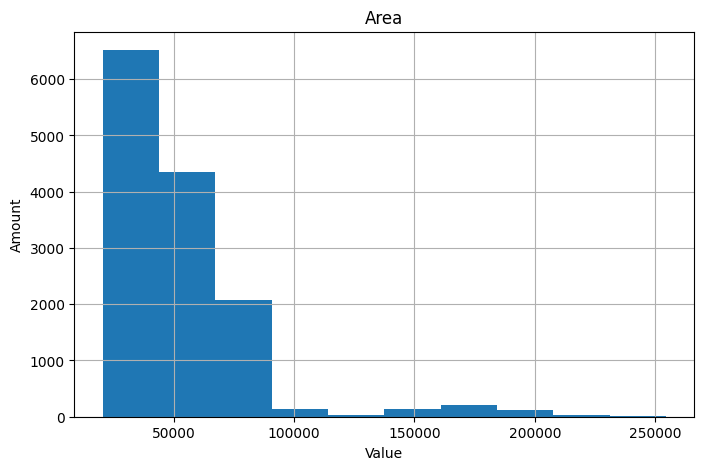

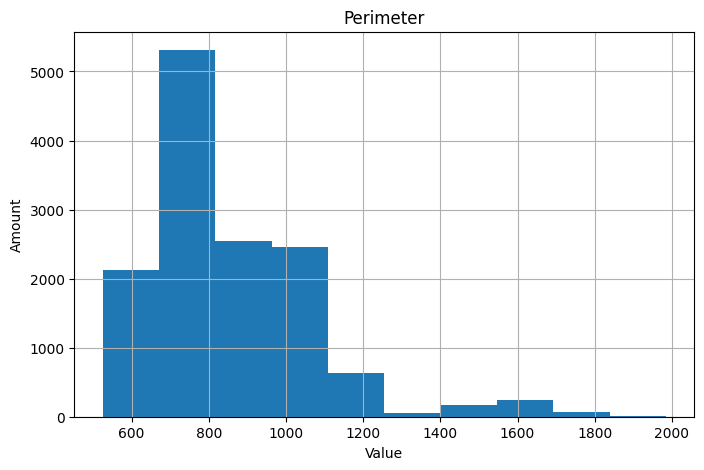

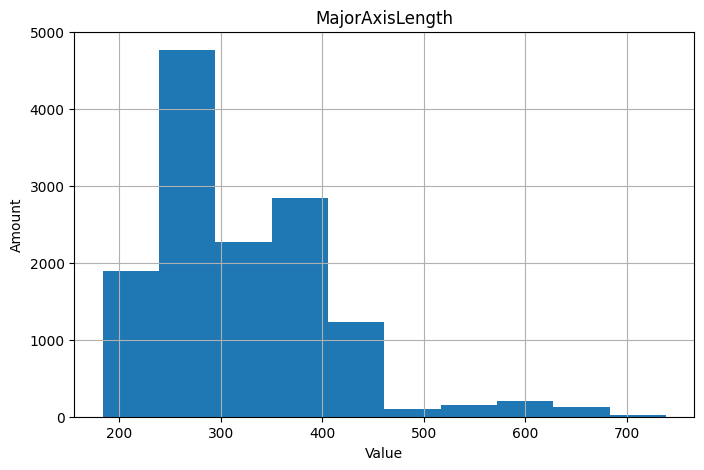

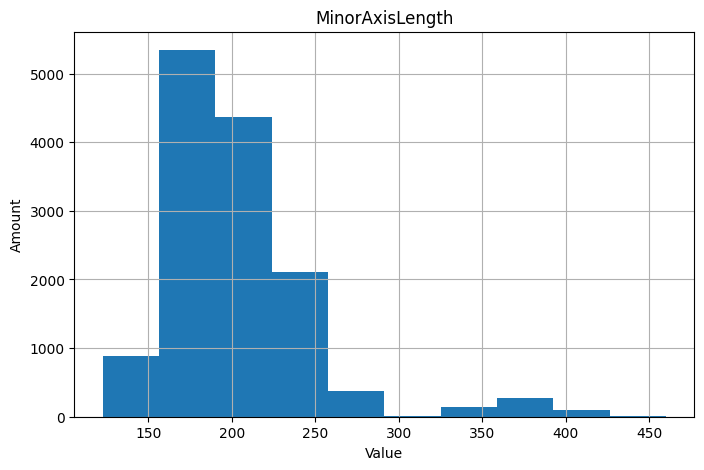

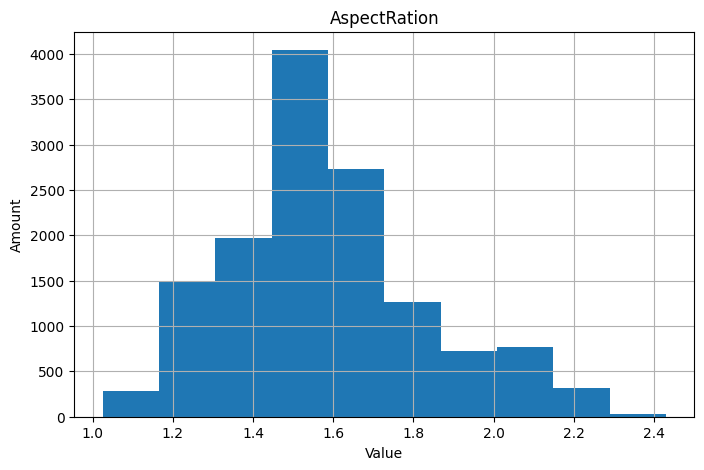

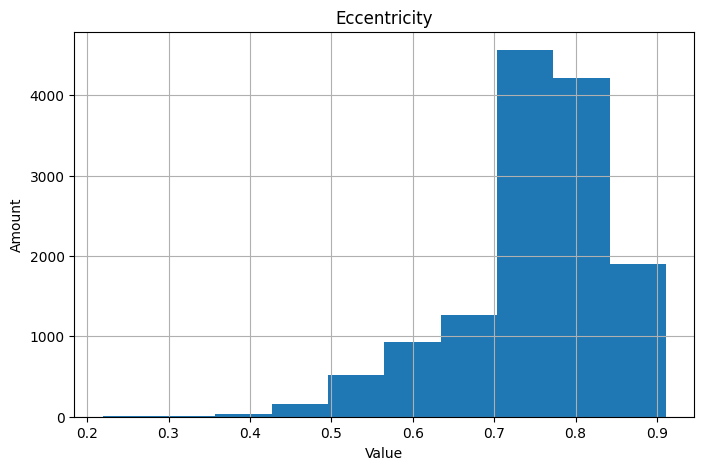

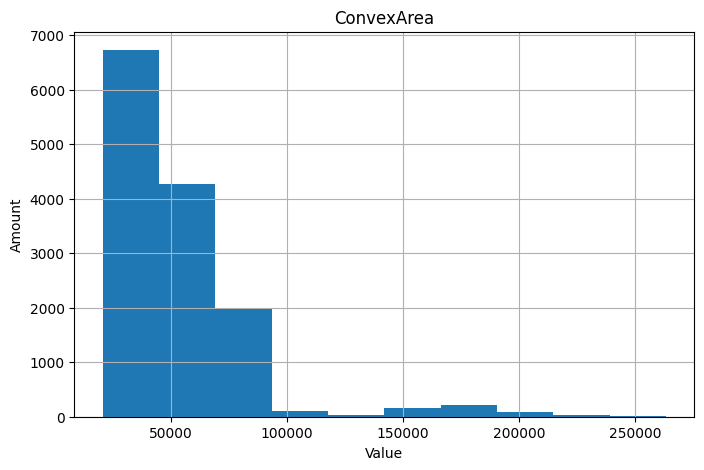

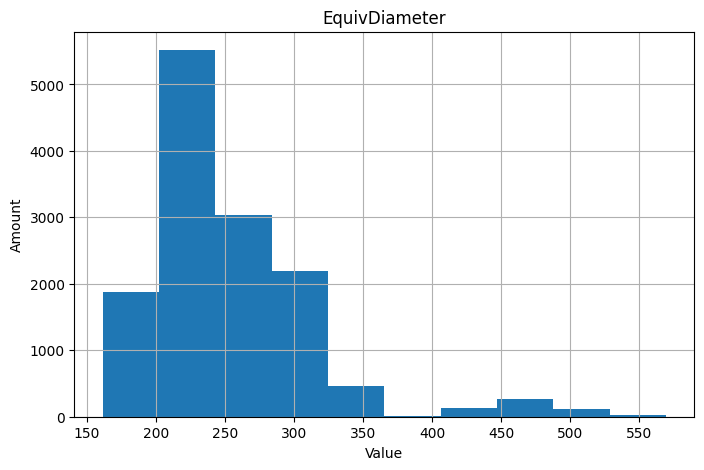

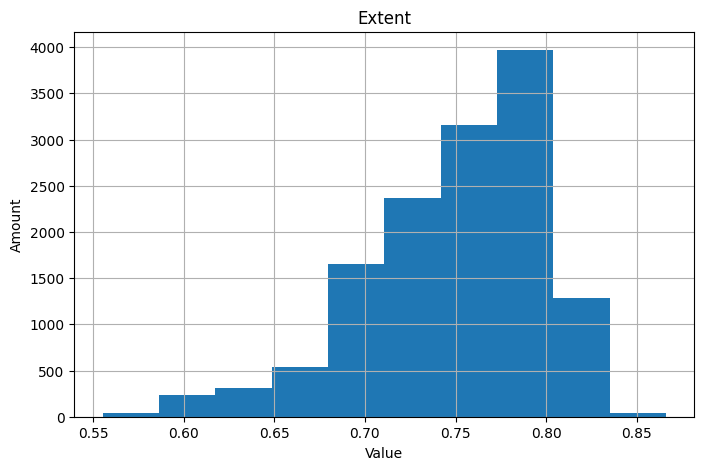

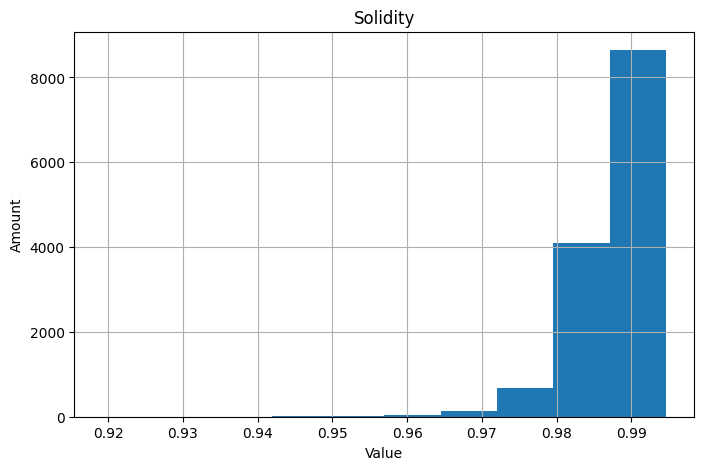

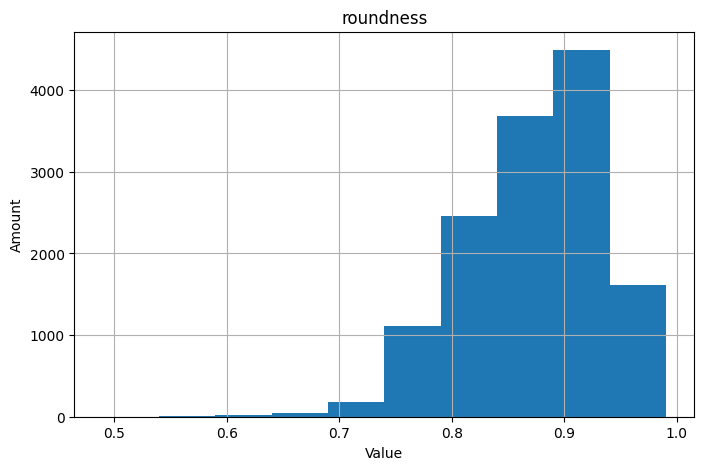

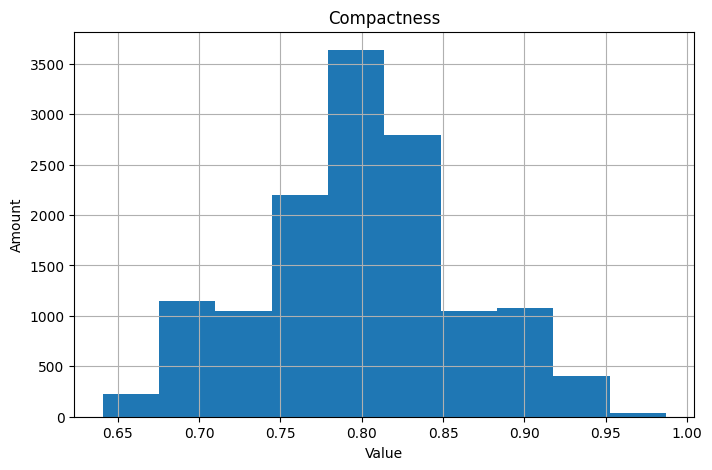

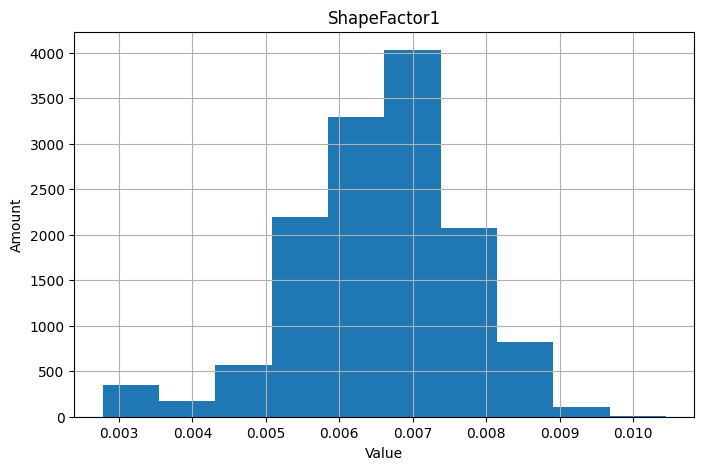

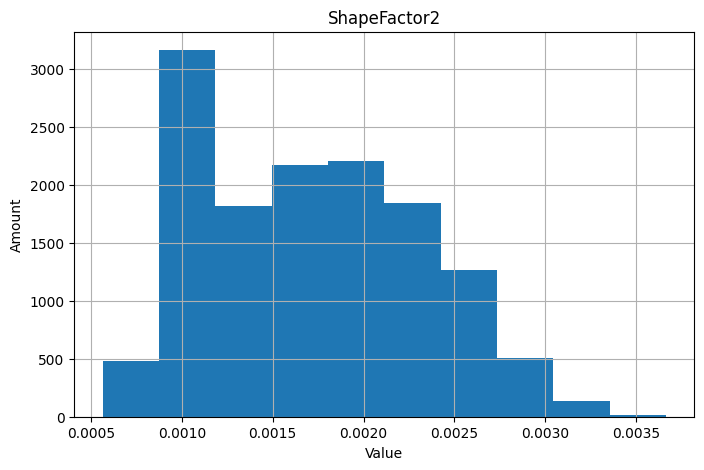

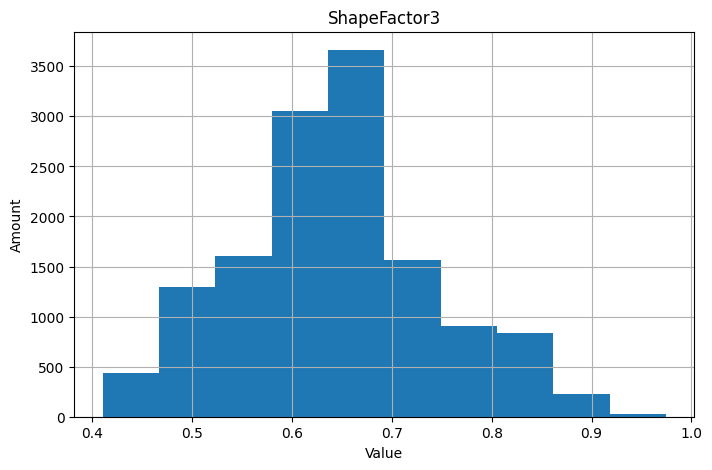

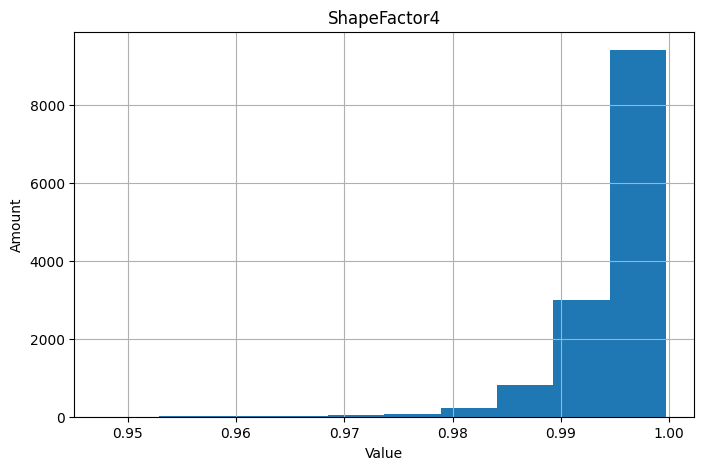

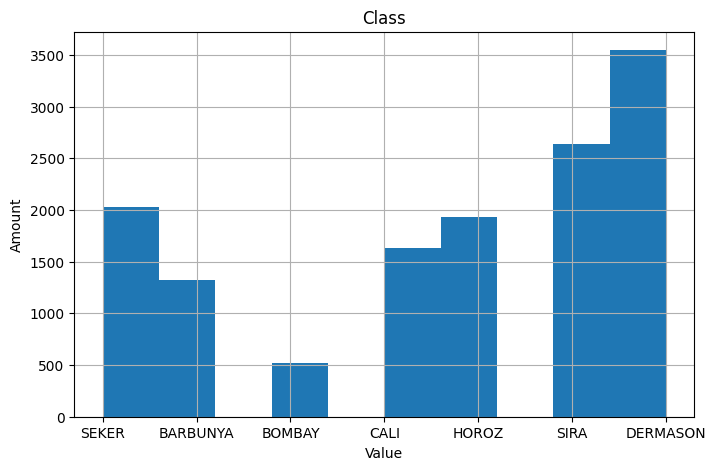

In [29]:
# Задание 5
for col in df.columns:
    plt.figure(figsize=(8,5))
    plt.title(col)
    plt.ylabel('Amount')
    plt.xlabel('Value')
    print(df[col].hist())

In [30]:
# Задание 6
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[['Class']])
encoded_cols = encoder.get_feature_names_out(['Class'])
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)
df = pd.concat([df, encoded_df], axis=1)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor3,ShapeFactor4,Class,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.834222,0.998724,SEKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,...,0.909851,0.998430,SEKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.825871,0.999066,SEKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.861794,0.994199,SEKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.941900,0.999166,SEKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.642988,0.998385,DERMASON,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.676099,0.998219,DERMASON,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.676884,0.996767,DERMASON,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,...,0.668237,0.995222,DERMASON,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
# Задание 7
X = df.drop(columns=[
    'Class_BARBUNYA',
    'Class_BOMBAY',
    'Class_CALI',
    'Class_DERMASON',
    'Class_HOROZ',
    'Class_SEKER',
    'Class_SIRA',
    'Class'
])
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Задание 8

Выбрал модель логистической регрессии

In [ ]:
# Задание 8
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'acc: {accuracy_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'precision: {precision_score(y_test, y_pred, average="macro")}')

acc: 0.9269188395152406
recall: 0.9371138795733472
precision: 0.9396248297178226


In [ ]:
# Задание 9
# 1) Обучение на первых 10 признаках
model = LogisticRegression()
model.fit(X_train[:, 0:10], y_train)
y_pred = model.predict(X_test[:, 0:10])
print(f'acc: {accuracy_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'precision: {precision_score(y_test, y_pred, average="macro")}')

acc: 0.9140653690782226
recall: 0.9252061992007492
precision: 0.9291177193111879


In [40]:
# Задание 9
# 2) Обучение на строках через 100
model.fit(X_train[::100], y_train[::100])
y_pred = model.predict(X_test)
print(f'acc: {accuracy_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'precision: {precision_score(y_test, y_pred, average="macro")}')

acc: 0.8619170033051781
recall: 0.8444674891858595
precision: 0.8951154018340158


In [41]:
# Задание 11
param_grid = {
    'C': [100, 1000],
    'class_weight': [None, 'balanced'],
    'max_iter': [500, 1000]
}
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print(f'Best params: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

Best params: {'C': 100, 'class_weight': None, 'max_iter': 500}
Best score: 0.9249632500728673


In [42]:
# Задание 12 (посмотрим какие признаки для каждого класса оказались самыми важными, т.е по модулю весов)
weights_df = pd.DataFrame(model.coef_, columns=X.columns)
weights_df['class'] = model.classes_

sorted_all = {}

for cls in model.classes_:
    coef = weights_df[weights_df['class'] == cls].iloc[0, :-1]
    sorted_idx = np.argsort(np.abs(coef))[::-1]

    sorted_all[cls] = pd.DataFrame({
        'feature': X.columns[sorted_idx],
        'weight': coef.iloc[sorted_idx].values,
        'abs_weight': np.abs(coef.iloc[sorted_idx].values)
    })

sorted_all

{'BARBUNYA':             feature    weight abs_weight
 0         roundness -1.098285   1.098285
 1      ShapeFactor4  0.689689   0.689689
 2      ShapeFactor1 -0.640644   0.640644
 3         Perimeter  0.515451   0.515451
 4   MinorAxisLength  0.463787   0.463787
 5            Extent -0.361726   0.361726
 6     EquivDiameter  0.344798   0.344798
 7       Compactness  0.293025   0.293025
 8      ShapeFactor3  0.291545   0.291545
 9      AspectRation -0.274976   0.274976
 10     Eccentricity -0.261873   0.261873
 11       ConvexArea  0.223786   0.223786
 12             Area  0.220929   0.220929
 13  MajorAxisLength  0.203249   0.203249
 14         Solidity -0.183856   0.183856
 15     ShapeFactor2 -0.092149   0.092149,
 'BOMBAY':             feature    weight abs_weight
 0              Area  0.708322   0.708322
 1        ConvexArea  0.698827   0.698827
 2   MinorAxisLength  0.670007   0.670007
 3     EquivDiameter  0.597401   0.597401
 4         Perimeter  0.524617   0.524617
 5   MajorA

**Анализ**

Анализ весов показывает, что для классификации сортов фасоли наиболее значимы признаки, связанные с формой: ShapeFactor1–4, roundness, AspectRation. Это логично, поскольку сорта различаются прежде всего геометрией и пропорциями. Размерные параметры — Area, ConvexArea, Perimeter, длины осей — тоже важны, но их влияние зависит от конкретного сорта. Например, для BOMBAY ключевую роль играет площадь, а для BARBUNYA — округлость и факторы формы. В целом модель использует признаки вполне ожидаемым образом, что подтверждает корректность набора характеристик и естественную интерпретацию задачи.